### Tutorial Link : https://towardsdatascience.com/market-basket-analysis-using-associative-data-mining-and-apriori-algorithm-bddd07c6a71a

### Theory
1. *Support*: It tells us about the combination of items bought together frequently. It gives the part of transactions that contain both A and B.
2. *Confidence*: It tells us how frequently the items A and B are bought together, for the no. of times A is bought.
3. *Lift*: It indicates the strength of a rule over the randomness of A and B being bought together. It basically measures the strength of any association rule(we will talk about association rules below).

    More the lift more is the strength of the rule. If the lift is 3 for A -> B then it means if we buy A, the chances of buying B is 3 times.
    Apriori algorithm uses frequently bought item-sets to generate association rules. It is built on the idea that the subset of a frequently bought items-set is also a frequently bought item-set. Frequently bought item-sets are decided if their support value is above a minimum threshold support value.



In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

In [2]:
read_df = pd.read_csv("transaction_data.csv")
df = read_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [3]:
df = df[df.UserId>0] # usedid <=0 : 25%
df = df[df.ItemCode>0]
df = df[df.NumberOfItemsPurchased>0]
df = df[df.CostPerItem>0]
df = df[df.ItemDescription.notna()]
df = df[df.TransactionTime.str[-4:] != "2028"]

/Users/deepanshukandpal/opt/anaconda3/envs/PlatformML/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0, 0.5, 'No. of transactions')

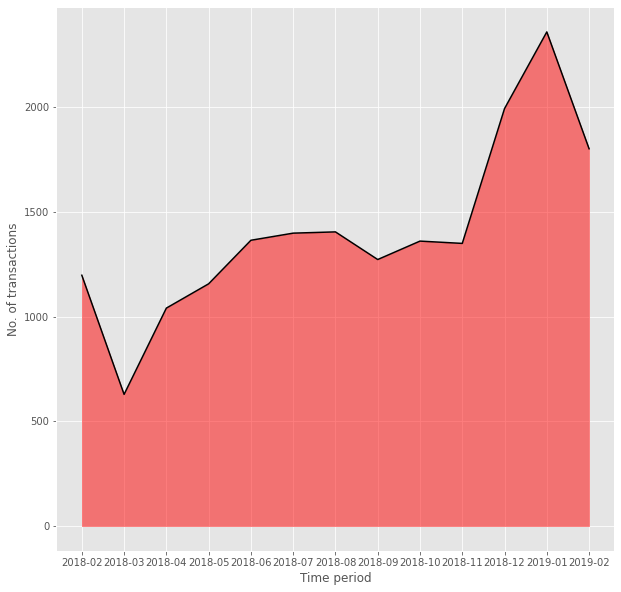

In [4]:
df.TransactionTime = pd.to_datetime(df.TransactionTime)
df["month_year"]= pd.to_datetime(df.TransactionTime).dt.to_period("M")
df.sort_values(by = ["month_year"], inplace = True)
Ser = df.groupby("month_year").TransactionId.nunique()
x = np.arange(0,len(Ser),1)
style.use("ggplot")
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.plot(x, Ser, color = "k")
ax1.fill_between(x, Ser, color = "r", alpha = 0.5)
ax1.set_xticks(x)
ax1.set_xticklabels(Ser.index)
plt.xlabel("Time period")
plt.ylabel("No. of transactions")


In [6]:
Ser = df.groupby("TransactionId").ItemDescription.nunique()
Ser.describe()

count    18334.000000
mean        21.014236
std         23.838977
min          1.000000
25%          7.000000
50%         15.000000
75%         27.000000
max        540.000000
Name: ItemDescription, dtype: float64

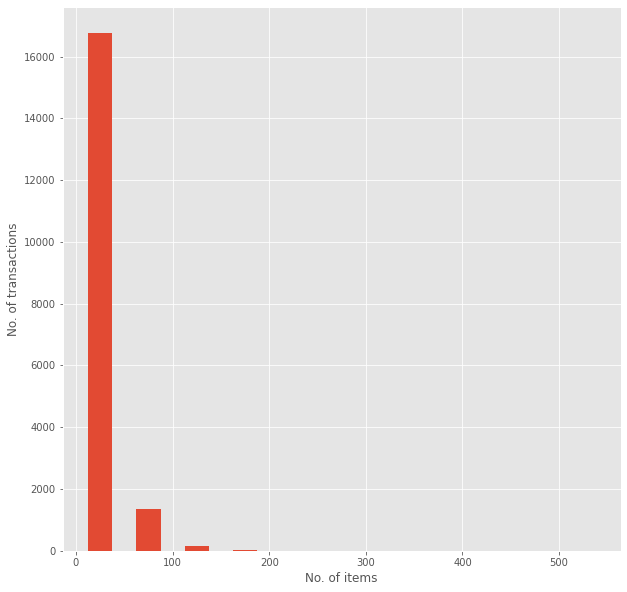

In [7]:
bins = [0,50,100,150,200,250,300,350,400,450,500,550]
fig = plt.figure(figsize = (10,10))
plt.hist(Ser, bins, histtype = 'bar', rwidth = 0.5)
plt.xlabel('No. of items')
plt.ylabel('No. of transactions')
plt.show()

<BarContainer object of 10 artists>

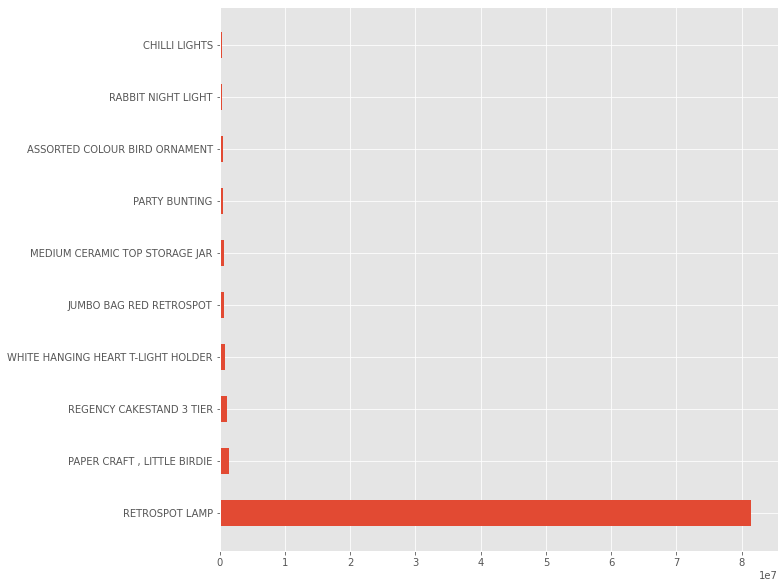

In [8]:
df["total_cost_item"] = df.NumberOfItemsPurchased*df.CostPerItem
Ser = df.groupby("ItemDescription").total_cost_item.sum()
Ser.sort_values(ascending = False, inplace = True)
Ser = Ser[:10]
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.barh(Ser.index, Ser, height = 0.5)

In [9]:
df_set = df.groupby(['TransactionId', 'ItemDescription']).NumberOfItemsPurchased.sum().unstack().reset_index().fillna(0).set_index('TransactionId')

In [11]:
def encode(x):
    if x <= 0:
         return 0
    else:
         return 1
df_set = df_set.applymap(encode)
df_set

ItemDescription,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
TransactionId,,,,,,,,,,,,,,,,,,,,,
5900015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [12]:
frequent_itemsets = apriori(df_set, min_support = 0.015, use_colnames = True)

/Users/deepanshukandpal/opt/anaconda3/envs/PlatformML/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Text(0, 0.5, 'Support')

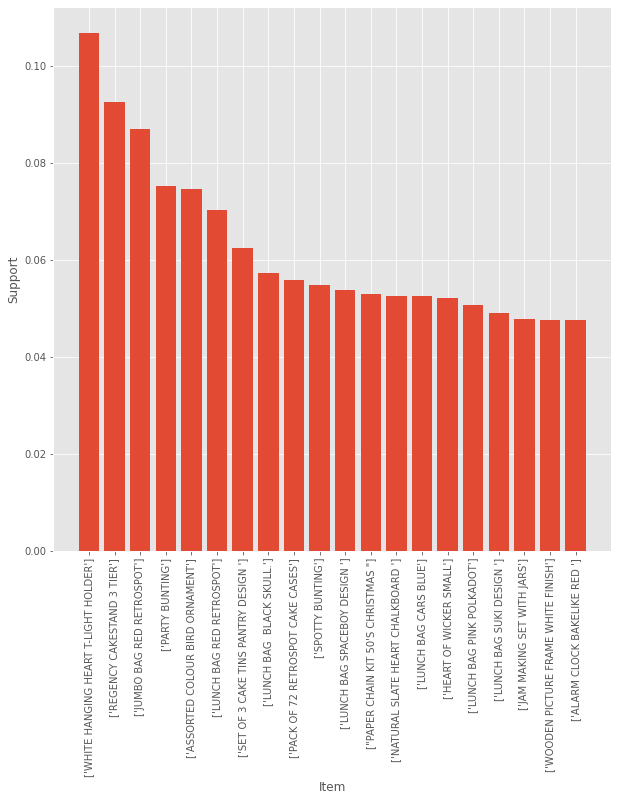

In [13]:
frequent_itemsets = apriori(df_set, min_support = 0.015, use_colnames = True)
top_items = frequent_itemsets.sort_values('support', ascending = False)[:20]
for i in range(len(top_items.itemsets)):
    top_items.itemsets.iloc[i] = str(list(top_items.itemsets.iloc[i]))
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(top_items.itemsets, top_items.support)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.xlabel('Item')
plt.ylabel('Support')

In [14]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.2)

In [16]:
top_rules = rules.sort_values("confidence", ascending = False)[:10]


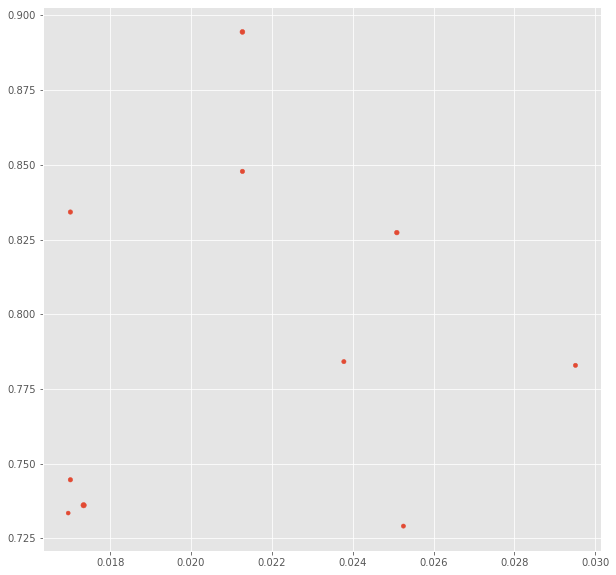

In [17]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.scatter(top_rules.support, top_rules.confidence, top_rules.lift)


{'r': Text(-0.8583822376423246, -0.1954545660296541, 'r'),
 '0': Text(0.8542216103631285, -0.5667560317556504, '0'),
 'PINK REGENCY TEACUP AND SAUCER': Text(0.642834830969781, -0.6384478734009897, 'PINK REGENCY TEACUP AND SAUCER'),
 'r0': Text(-0.6114650528536264, 0.9083654192771322, 'r0'),
 'ROSES REGENCY TEACUP AND SAUCER ': Text(0.724461056984943, 0.8297346581138536, 'ROSES REGENCY TEACUP AND SAUCER '),
 'GREEN REGENCY TEACUP AND SAUCER': Text(0.5657014486421621, -0.8205484378074952, 'GREEN REGENCY TEACUP AND SAUCER'),
 '1': Text(-0.3638589081390706, 1.0403795790059702, '1'),
 'r1': Text(0.9700475424598147, 0.2555750535570571, 'r1'),
 '2': Text(0.3994895959048728, 0.8638225008222851, '2'),
 'r2': Text(0.3338779945216925, -0.9113978104759617, 'r2'),
 'REGENCY CAKESTAND 3 TIER': Text(0.48293594796603884, 1.000237014559437, 'REGENCY CAKESTAND 3 TIER'),
 '3': Text(-0.9545122885177949, 0.4388813672011561, '3'),
 'r3': Text(-0.08074951986106801, -0.8353200754518613, 'r3'),
 '4': Text(-0.2

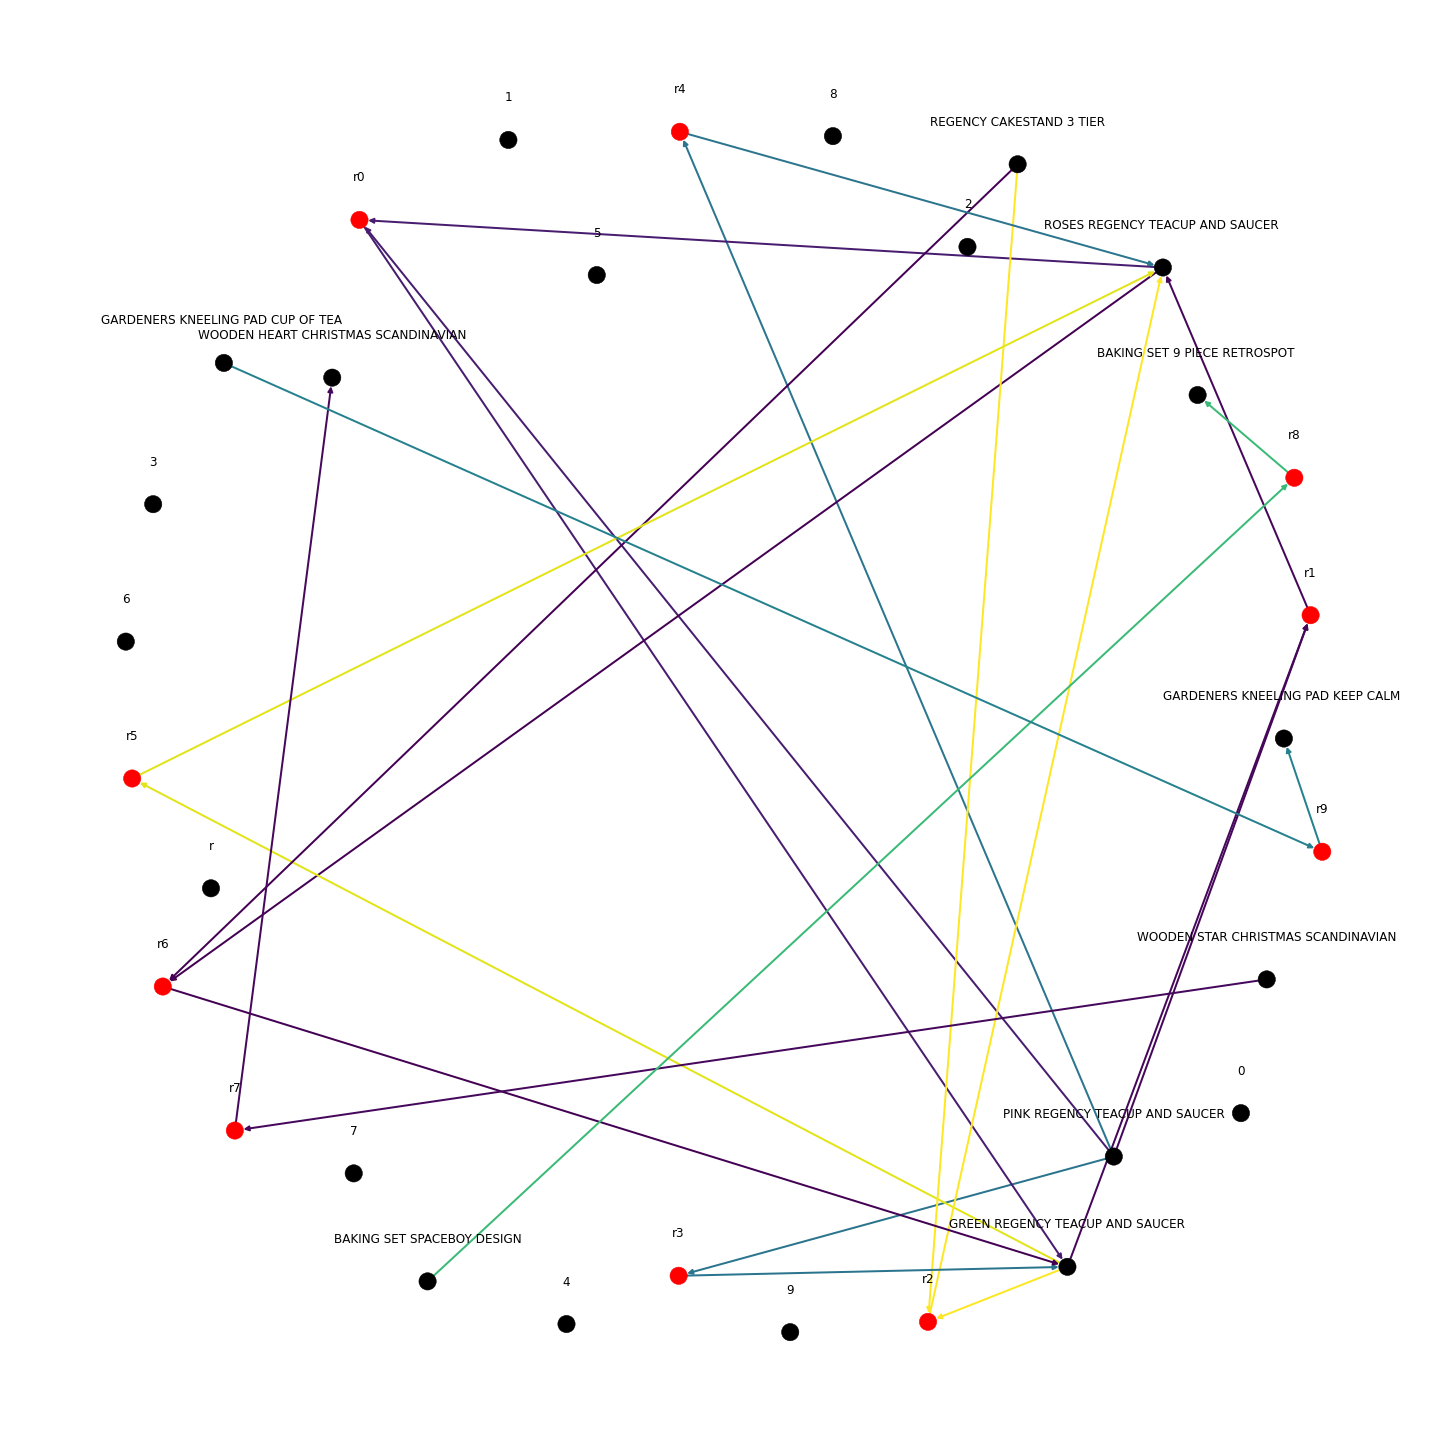

In [24]:
import networkx as nx
G1 = nx.DiGraph()
color_map = []
N = 50
colors = np.random.rand(N)
strs = ['r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9']
for i in range(10):
    G1.add_nodes_from('r'+str(i))
    for a in top_rules.iloc[i]['antecedents']:
        G1.add_nodes_from([a])
        G1.add_edge(a, 'r'+str(i), color = colors[i], weight = 2)
    for c in top_rules.iloc[i]['consequents']:
        G1.add_nodes_from([c])
        G1.add_edge('r'+str(i), c, color = colors[i], weight = 2)
for node in G1:
    found_a_string = False
    for item in strs:
        if node == item:
            found_a_string = True
    if found_a_string:
        color_map.append('red')
    else:
        color_map.append('black')
edges = G1.edges()
colors = [G1[u][v]['color'] for u,v in edges]
weights = [G1[u][v]['weight'] for u,v in edges]
pos = nx.spring_layout(G1, k = 16, scale = 1)
fig = plt.figure(figsize = (20,20))
nx.draw(G1, pos, node_color = color_map, edge_color = colors, width = weights, font_size = 16, with_labels = False)
for p in pos:
    pos[p][1] += 0.07
nx.draw_networkx_labels(G1, pos)

In [20]:
rules[(rules.lift >= 9.388) & (rules.confidence >= 0.429)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.033272,0.042817,0.018545,0.557377,13.017772,0.017120,2.162525
5,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.042817,0.033272,0.018545,0.433121,13.017772,0.017120,1.705352
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.042817,0.047562,0.028744,0.671338,14.115027,0.026708,2.897922
7,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.047562,0.042817,0.028744,0.604358,14.115027,0.026708,2.419316
8,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE RED ),0.025363,0.047562,0.017018,0.670968,14.107251,0.015811,2.894665
10,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.033272,0.047562,0.021436,0.644262,13.545763,0.019853,2.677361
11,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.047562,0.033272,0.021436,0.450688,13.545763,0.019853,1.759890
13,(BAKING SET SPACEBOY DESIGN),(BAKING SET 9 PIECE RETROSPOT ),0.023126,0.046580,0.016963,0.733491,15.746857,0.015886,3.577434
14,(CHARLOTTE BAG PINK POLKADOT),(RED RETROSPOT CHARLOTTE BAG),0.026508,0.040253,0.017508,0.660494,16.408528,0.016441,2.826891
15,(RED RETROSPOT CHARLOTTE BAG),(CHARLOTTE BAG PINK POLKADOT),0.040253,0.026508,0.017508,0.434959,16.408528,0.016441,1.722871
